# Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is the first crucial step in analyzing the bankruptcy dataset. In this phase, we will examine the dataset to understand its structure, identify any key patterns or relationships between financial indicators, and detect any outliers or anomalies that could impact model performance. By summarizing the key characteristics of the data—such as distributions, correlations, and class balance—we can uncover insights that will guide subsequent steps in the project.

## Company Bankruptcy Dataset
 
This project focuses on predicting company bankruptcy using a dataset provided by the Taiwan Economic Journal, covering the years 1999–2009. The dataset comprises 6819 rows and 96 columns. Each row represents a specific company, with 95 feature columns (X1 to X95) that provide detailed financial ratios, such as:

Profitability Ratios (e.g., return on assets, return on equity)
Liquidity Ratios (e.g., current ratio, quick ratio)
Solvency Ratios (e.g., debt-to-equity ratio)
Efficiency Ratios (e.g., asset turnover)
In addition to these, the dataset includes other performance metrics and binary flags derived from company data. These attributes collectively reflect various aspects of financial health, operational efficiency, and liquidity, making them crucial predictors for the target variable.

The target variable is binary, indicating whether a company went bankrupt (1) or did not (0) during the given period.

### 1. Necessary Modules to Import
In this part of project, the following Python libraries are imported for performing Exploratory Data Analysis (EDA):

<b> pandas</b>:
This library is essential for data manipulation and analysis. It provides powerful data structures like DataFrames, which make handling structured data efficient.
Role in EDA:

Reading data from external files (e.g., CSV, Excel).
Cleaning and preprocessing data.
Filtering, grouping, and aggregating data for deeper analysis.
Reshaping data for better insights.

<b> matplotlib.pyplot</b>:
A core visualization library used for creating static and interactive plots. It offers tools for customizing visual elements such as colors, labels, and styles.
Role in EDA:

Visualizing trends, distributions, and relationships in the dataset.
Generating basic plots like line plots, bar charts, histograms, and scatterplots to gain initial insights.

<b>seaborn</b>:
A statistical data visualization library built on top of matplotlib. It simplifies the creation of visually appealing and informative plots.
Role in EDA:

Exploring relationships between variables using advanced visualizations like pair plots, heatmaps, and violin plots.
Enhancing the interpretability of data with aesthetically pleasing plots.

In [1]:
# Import different packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Dataset Loading Section:
The goal of this step is to load the raw dataset from the specified file path and inspect its initial structure.
This step provides an initial glance at the dataset, enabling us to verify its format and structure before proceeding with further analysis.

This is useful for:
a) Ensuring the data has been loaded correctly.
b) Observing the column names and data structure (e.g., numeric, categorical, etc.).
c) Gaining an initial understanding of the dataset’s contents.

In [2]:
# Load the data and display the first 5 rows

file_path = '../1_data/1.1_raw/data.csv'  
data = pd.read_csv(file_path)

data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [8]:
data.columns.to_list()[:5]

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin']

Note: Since some column names contain leading or trailing spaces, which can make them difficult to work with, remove these white spaces from the column names for consistency and ease of access.

In [9]:
# Strip the column names

column_names = data.columns.to_list()
# column_rename_dict = {}
for i, column in enumerate(column_names):
    column_names[i] = column.strip()

data.columns = column_names
data.columns.to_list()[:5]

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin']

In [10]:
# Shape of the data

data.shape

(6819, 96)

In [11]:
# Basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

### 3. Data Quality Assessment and Preprocessing
This step is crucial in any data analysis or machine learning project, as it involves evaluating the dataset's quality and preparing it for further analysis or modeling. It includes identifying and handling missing values, removing duplicates, ensuring all relevant features are numeric, identifying integer columns, counting unique values in integer columns to assess categorical features, dropping constant columns that provide no value, and generating a statistical summary to understand data distribution and detect outliers.

In [12]:
# Checking missing values

missing_values_count = data.isnull().sum().reset_index()
missing_values_count.columns = ['feature', 'missing_count']

missing_values_count[missing_values_count['missing_count'] > 0]

Empty DataFrame
Columns: [feature, missing_count]
Index: []

In [13]:
# Checking for duplicates

data.duplicated().sum()

np.int64(0)

There are no missing values or duplicated rows in the table.

In [14]:
# Checking if all features are numeric

data.select_dtypes(include=[int, float]).shape

(6819, 96)

Each feature is either an integer or a float.

In [15]:
# Find the name of integer columns

list(data.select_dtypes(include=[int]).columns)

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

In [16]:
# Count different values of integer columns

data['Bankrupt?'].value_counts(normalize=True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

Note: Our target column is 'Bankrupt?', which is categorical with two classes. It is highly imbalanced, with the minority class having a frequency of 3.23% 

In [17]:
data['Liability-Assets Flag'].value_counts()

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

In [18]:
data['Net Income Flag'].value_counts()

Net Income Flag
1    6819
Name: count, dtype: int64

Hence, we have 93 float features, one binary categorical feature ('Liability-Assets Flag'), one binary categorical target ('Bankrupt?'), and one categorical feature ('Net Income Flag') with only one class. Since the 'Net Income Flag' column is constant and non-informative, we immediately drop it.

In [19]:
# Dropping a constant column

data.drop(columns=['Net Income Flag'], inplace=True)

data.shape

(6819, 95)

In [20]:
# Statistical summary of the dataset

data.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Liability-Assets Flag  Net Income to Total Assets  \
count            6819.000000                 6819.000000   
mean                0.001173                    0.807760   
std                 0.034234                    0.040332   
min                 0.000000                    0.000000   
25%                 0.000000                    

It seems that most features have values between 0 and 1, while other columns have much larger ranges (e.g., 1e+10). Therefore, we will apply standardization before modeling. Since we have many outliers or extreme values, as shown in the box plots below, we will use the RobustScaler.

### 4. Visualization Customization:

Visualization Customization refers to the process of modifying the default appearance of the visualizations to make them more informative, aesthetically pleasing, and tailored to your needs. This can involve setting various parameters that control the style and appearance of plots and charts. This stepincludes:
a) Pie Chart: Displays the proportion of bankrupt vs. non-bankrupt companies using the binary Bankrupt? column.
b) Boxplot: Shows the distribution of numeric features and highlights outliers, with each box representing the spread of a feature.
c) Correlation Heatmap: Visualizes the correlation between numeric features, with color intensity indicating the strength of the correlation. 


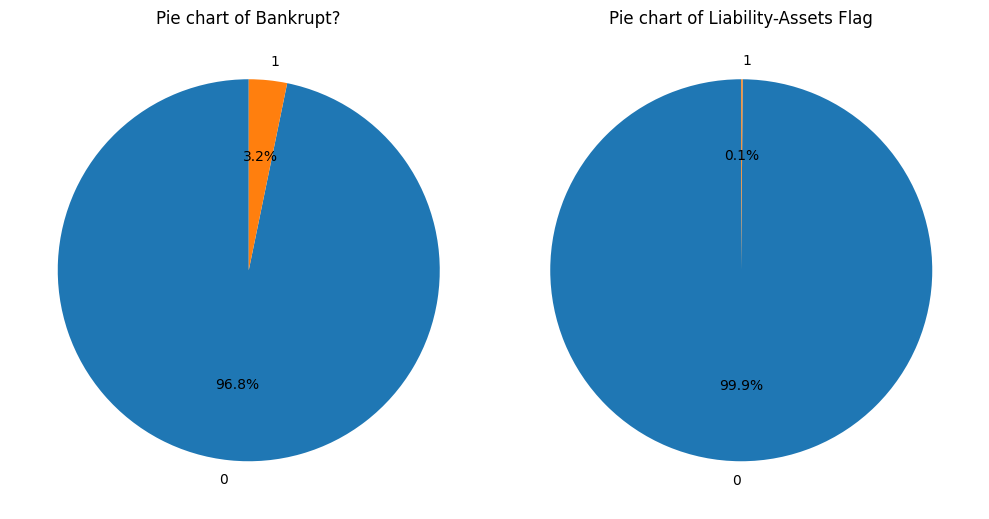

In [21]:
# Pie chart of the categorical features

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
categorical_features = data.select_dtypes(include=['int']).columns

for i, feature in enumerate(categorical_features):
    d = data[feature].value_counts()
    axes[i].pie(d, labels=d.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie chart of {feature}")

plt.tight_layout()
plt.show()

Note:The Bankrupt feature shows a significant class imbalance, which is common in bankruptcy prediction tasks. This imbalance may require special handling, such as oversampling the minority class or using appropriate evaluation metrics.
The Liability-Assets Flag feature has very few instances of the condition being true (0.1%), so it might not contribute much to the model or might need to be reviewed for potential data issues.

In [22]:
# Plot the histogram and box plot of float features

fig, axes = plt.subplots(93, 2, figsize=(15, 372))
numerical_features = data.select_dtypes(include=['float']).columns

for i, feature in enumerate(numerical_features):
    sns.histplot(data=data, y=feature, kde=True, bins=50, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {feature}')
    sns.boxplot(data=data, x='Bankrupt?', y=feature, ax=axes[i,1])
    axes[i,1].set_title(f'Box Plot of {feature} vs. Bankrupt?')

# Adjust layout
plt.tight_layout()
plt.show()



In [23]:
# Correlation matrix

correlation_matrix = data.corr()
correlation_matrix['Bankrupt?'].sort_values(ascending=False)  # Correlation with target variable

Bankrupt?                                                  1.000000
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
                                                             ...   
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) before interest and depreciation after tax         -0.273051
ROA(A) before interest and % after tax                    -0.282941
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, Length: 95, dtype: float64

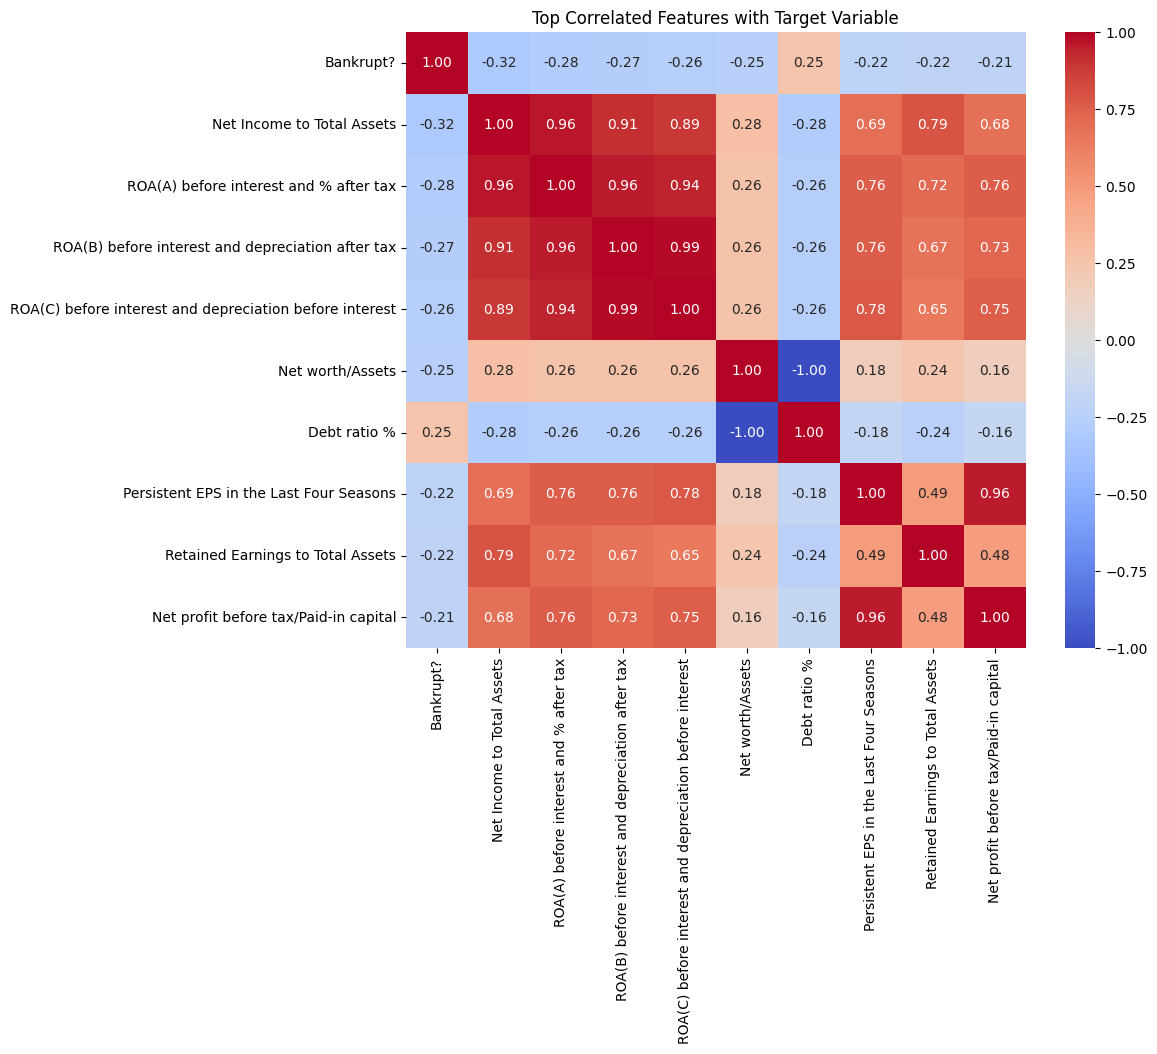

In [24]:
# Heatmap of top correlated features with the target variable

plt.figure(figsize=(10, 8))
top_corr_features = correlation_matrix['Bankrupt?'].abs().sort_values(ascending=False).head(10).index
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with Target Variable')
plt.show()
